## Name: Sanchit Kripalani <br> Batch: M1 <br> Roll No: 31145

### Problem statement:

**Data Visualization I**

1. use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains infomration about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find any patterns in the data.

2. Write a code to check how the price of the ticket (column name: 'fare' for each passenger is distributed by plotting a histogram)

**About the dataset:** The dataset has 891 rows and 15 columns. However, there are only 2 numeric columns, namely, Fare and Age.

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

%matplotlib inline

In [30]:
# Load the dataset into the dataframe
raw_data = sns.load_dataset('titanic')

raw_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
# Print the number of rows in the dataset
print(f'The number of rows in the dataset is: {raw_data.shape[0]}')
print(f'The number of columns dataset is: {raw_data.shape[1]}')

The number of rows in the dataset is: 891
The number of columns dataset is: 15


### Data Preprocessing

In [32]:
# .info() is used to get summary of dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


**Note: Since we are only dealing with numeric data, only null values in numeric columns will be replaced.**

In [33]:
# Check for null values in the dataset
raw_data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [57]:
# Replacing null ages with the mean age 
# Point to note: Age and fare are the only Numeric columns
mean_age = raw_data['age'].mean()

print(f'The mean age of passengers is: {mean_age: .2f}')

raw_data['age'].fillna(mean_age, inplace=True)

The mean age of passengers is:  29.70


### Visualisation

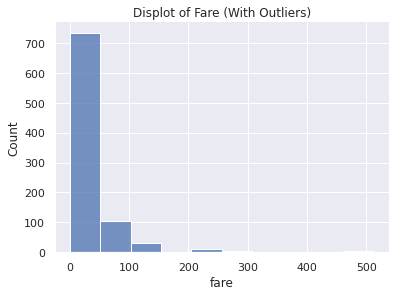

In [73]:
# Plotting the density plot for 'Fare' Column

sns.displot(raw_data['fare'], bins=10, kind='hist',
            height=4, aspect=1.4)

plt.title('Displot of Fare (With Outliers)')
plt.show()

**Observations:**

- The Displot indicates that most of the ticket Fares were below 200.
- We will have to look at what was Modal ticket Fare by getting rid of fares that are above a certain threashold. (Upper bound)

In [66]:
# Since the fares are unevenly distributed, 
# we will remove the fares above Q3 upper bound

q1 = np.quantile(raw_data['fare'], .25)
q3 = np.quantile(raw_data['fare'], .75)

# IQR is inter-quartile range
IQR = q3-q1

upper_bound = int(q3+IQR*1.5)

print(f'The upper bound for Fare Column is: {upper_bound}')

The upper bound for Fare Column is: 65


In [68]:
# Store the data without upper outliers in a dataframe
no_outlier_data = raw_data[raw_data['fare'] < upper_bound]

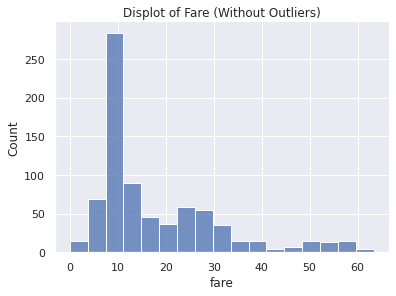

In [71]:
# Plot the Density with data without outliers
sns.displot(no_outlier_data['fare'], kind='hist',
            height=4, aspect=1.4)
plt.title('Displot of Fare (Without Outliers)')
plt.show()

**Observations**

Thus it is observed that the Modal Fare for passengers in titanic was around 5-15. 

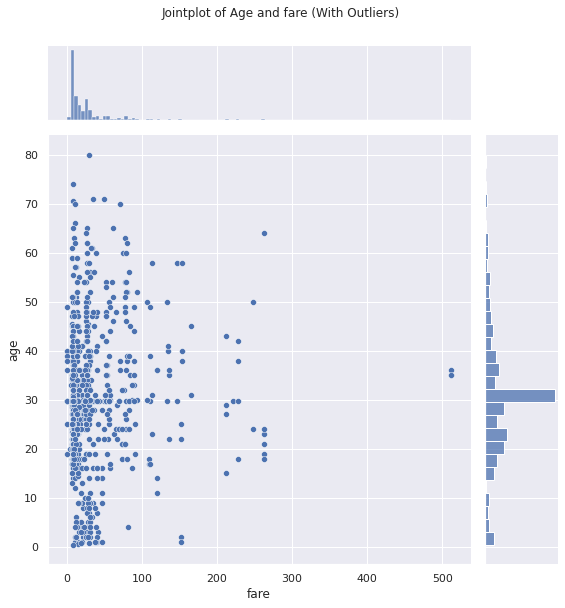

In [85]:
# Plotting the jointplot with outliers

joint_plot = sns.jointplot(data=raw_data, x='fare', y='age',
             height=8)

joint_plot.fig.suptitle('Jointplot of Age and fare (With Outliers)', y=1.05, x=0.5)

plt.show()

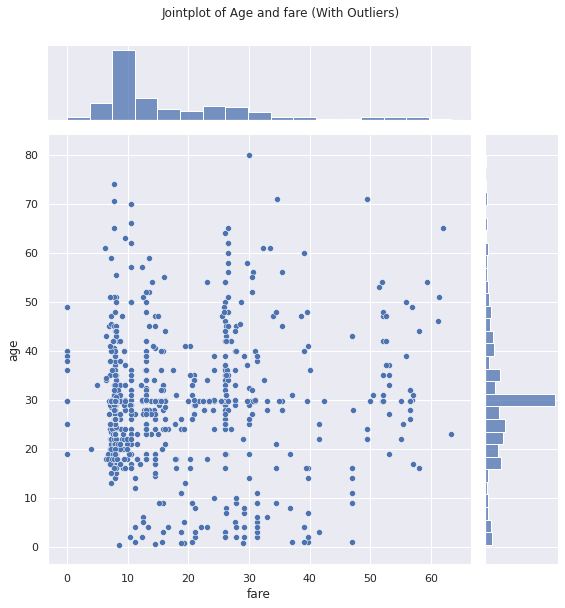

In [87]:
# Plotting the jointplot without outliers
joint_plot = sns.jointplot(data=no_outlier_data, x='fare', y='age',
             height=8)

joint_plot.fig.suptitle('Jointplot of Age and fare (With Outliers)', y=1.05, x=0.5)

plt.show()

**Observations**

Thus it is observed that:

- The majority of passengers between the age of 20-30 have paid a fair less than 15.

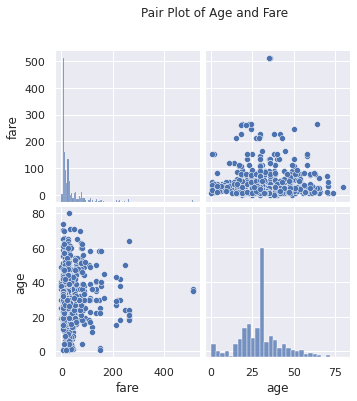

In [56]:
# Plotting the pair plot with outliers

numeric_data = raw_data.copy()[['fare', 'age']]

pair_plot = sns.pairplot(numeric_data)

pair_plot.fig.suptitle('Pair Plot of Age and Fare (With outliers)', y=1.1, x=0.6)

plt.show()

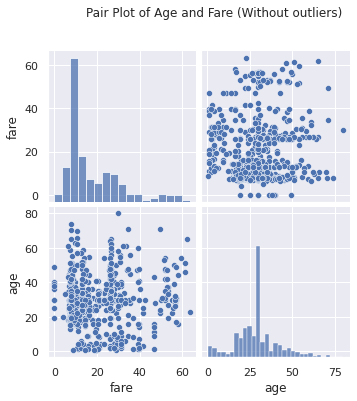

In [88]:
# Plotting the pair plot without outliers

numeric_data = no_outlier_data.copy()[['fare', 'age']]

pair_plot = sns.pairplot(numeric_data)

pair_plot.fig.suptitle('Pair Plot of Age and Fare (Without outliers)', y=1.1, x=0.6)

plt.show()

<AxesSubplot:title={'center':'Rugplot wrt Fare'}, xlabel='fare', ylabel='Density'>

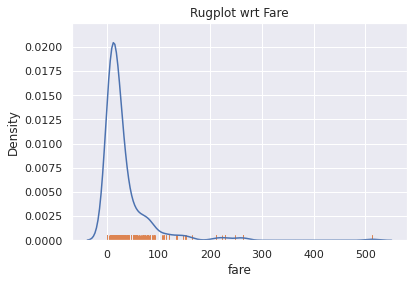

In [41]:
# Plotting the rugplot for Fare

plt.title('Rugplot wrt Fare')

sns.kdeplot(data=raw_data, x='fare')
sns.rugplot(data=raw_data, x='fare')

plt.show()

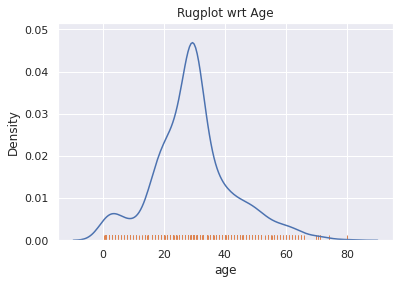

In [43]:
# Plotting the rugplot for Age

plt.title('Rugplot wrt Age')

sns.kdeplot(data=raw_data, x='age')
sns.rugplot(data=raw_data, x='age')

plt.show()

**Observations**

Thus it is observed that the Average Age of passengers is between 20-40.